# Regression Models

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from scipy import linalg
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



In [2]:
path = os.path.realpath('Regression_Models.ipynb')
dir = os.path.dirname(path)
dir = dir.replace('Models', 'Data')
os.chdir(dir)
data= pd.read_csv('../Data/data_preprocessed.csv', index_col=0)

In [3]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.199101,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,7.060069,129.422921,18630.057858,6.635246,344.894384,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,334.706620,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


This dataset is suitable for classification problem. Hence, we have to select an attribute as an outcome other than Potability.

# 1. Determining output attribute

### A. Building an linear regression and polynomial regression model

In [4]:
def build_model(y_col):

    X_data=data.drop(y_col,axis=1)
    X_train, X_test,y_train,y_test=train_test_split(X_data,data[y_col],test_size=0.25,random_state=1)
    #scaling the training dataset
    scaler=MinMaxScaler()
    X_train_scaled= scaler.fit_transform(X_train)
    X_test_scaled=scaler.transform(X_test)
    
    # Train the linear regression model with scaled data
    
    model_lin_s = LinearRegression()
    model_lin_s.fit(X_train_scaled, y_train)
    r_sq2 = model_lin_s.score(X_train_scaled, y_train)
    print(f"R square value on training data (Linear Regression) {r_sq2}")
    r_tsq2 = model_lin_s.score(X_test_scaled, y_test)
    print(f"R square value on testing data (Linear Regression) {r_tsq2}")
    print("\n Polynomial Regression models with")
    #Linear Regression with polynomial features (Polynomial regression model) on entire dataset
    for n in range(1,6):
        print(f"Degree {n}")
        determine_Poly(n,X_train_scaled,y_train,X_test_scaled,y_test)

In [5]:
def determine_Poly(degree,X_train_scaled,y_train,X_test_scaled,y_test):
    #determining the optimal polynomial degree
    
    polynomial_features=PolynomialFeatures(degree=degree)
    X_poly_scaled=polynomial_features.fit_transform(X_train_scaled)

    model_lin =LinearRegression()
    model_lin.fit(X_poly_scaled, y_train)

    y_predict=model_lin.predict(X_poly_scaled)
    r2=r2_score(y_train,y_predict)
    print(f"R square on traning data: {r2}")
    y_predict=model_lin.predict(polynomial_features.fit_transform(X_test_scaled))
    r2=r2_score(y_test,y_predict)
    print(f"R square on testing data: {r2}")

In [6]:
def determine_outcome_attribute( output):
    #building models for each attribute
    build_model(output)

In [7]:
y_attribute=['ph','Hardness','Solids','Chloramines','Sulfate','Trihalomethanes','Organic_carbon','Turbidity','Conductivity']
for output_attribute in y_attribute:
    print('\n')
    print(f" For output attributes as {output_attribute}")
    determine_outcome_attribute(output_attribute)



 For output attributes as ph
R square value on training data (Linear Regression) 0.029554010760489358
R square value on testing data (Linear Regression) 0.03617719407437492

 Polynomial Regression models with
Degree 1
R square on traning data: 0.029554010760489358
R square on testing data: 0.03617719407437492
Degree 2
R square on traning data: 0.11136796439826613
R square on testing data: 0.11365027248364346
Degree 3
R square on traning data: 0.17624510539959937
R square on testing data: 0.06481457300609739
Degree 4
R square on traning data: 0.3641820986177612
R square on testing data: -0.44420555458737
Degree 5
R square on traning data: 0.7866640060312086
R square on testing data: -39.386587266664655


 For output attributes as Hardness
R square value on training data (Linear Regression) 0.03290790641770991
R square value on testing data (Linear Regression) 0.03295894729513571

 Polynomial Regression models with
Degree 1
R square on traning data: 0.03290790641771002
R square on test

### B. Plotting heatmap 

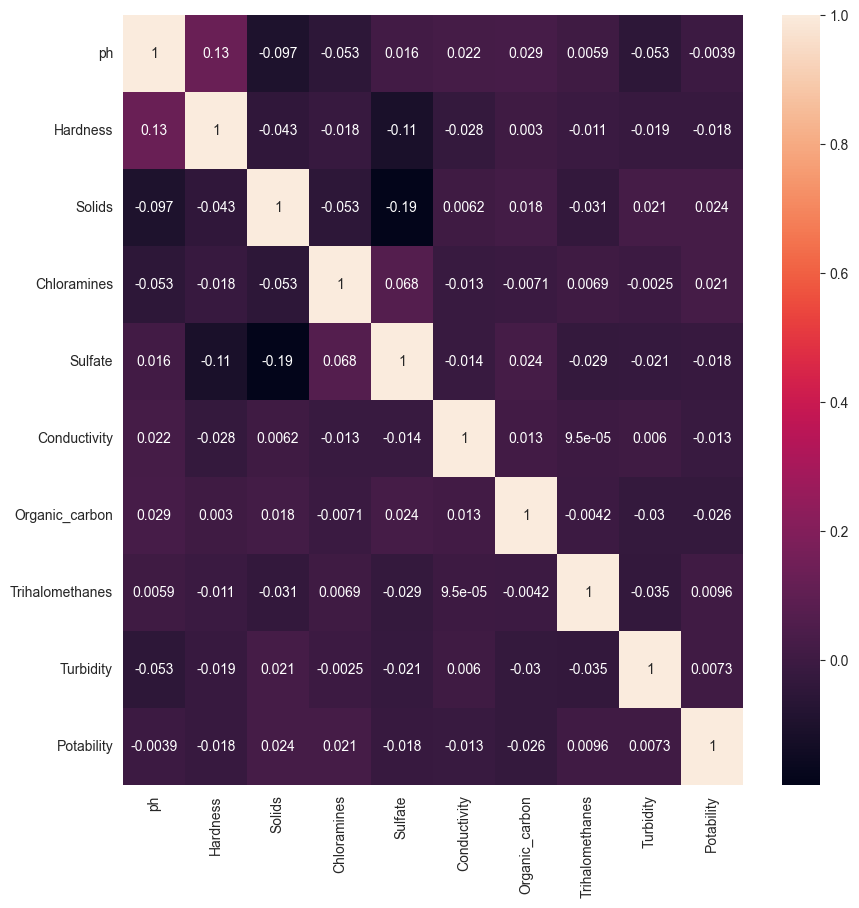

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

### C. Output attribute: Sulfate

The linear regression models and heatmap both indicate that attribute 'Sulfate' has high correlation. With 
'Hardness' and 'Solids' it has R2 as -0.11 and -0.19 respectively. And R square value on training data 
 is 0.06172462966187864 and on testing data is 0.0434276768150883, which can be increase with Polynomial 
regression.

# 2. Simple Linear Regression models 

In [9]:
X_cols=['ph', 'Hardness','Solids','Chloramines','Conductivity','Trihalomethanes','Organic_carbon','Turbidity','Potability']
y_col=['Sulfate']

In [10]:
#splitting the dataset
X_train, X_test,y_train,y_test=train_test_split(data[X_cols],data[y_col],test_size=0.25,random_state=42)

In [11]:

def find_r2(x_attribute):
    X= X_train[x_attribute]
    y = y_train[y_col]
    X2= np.array(X).reshape(-1,1) # reshape(-1,1) makes the array horizontal, y is vertical

    # Train the model
    model_lin = LinearRegression()
    model_lin.fit(X2, y)
    r_sq2 = model_lin.score(X2, y)

    #testing test dataset
    x_test= X_test[x_attribute]
    y_t = y_test[y_col]
    x_test= np.array(x_test).reshape(-1,1) # reshape(-1,1) makes the array horizontal, y is vertical
    y_pred = model_lin.predict(x_test)
    r_tsq2 = model_lin.score(x_test, y_t)
    
    fig , axes = plt.subplots(1, 2, figsize = (10, 5))
    
    axes[0].scatter(X2, y, color='black', label='observed')
    axes[0].plot(X2, model_lin.predict(X2), label='fit', color='Green', linewidth=2)
    axes[0].set_xlabel(x_attribute)
    axes[0].set_ylabel('Sulfate')
    axes[0].set_title('Training data r-squared = {:.4f}'.format(r_sq2))
    axes[0].legend(loc='best')

    axes[1].scatter(x_test, y_t,color='black', label='observed')
    axes[1].plot(x_test, y_pred, label='predicted', color='Green', linewidth=2)
    axes[1].set_xlabel(x_attribute)
    axes[1].set_ylabel('Sulfate')
    axes[1].set_title('Testing data r-squared = {:.4f}'.format(r_tsq2))
    axes[1].legend(loc='best')

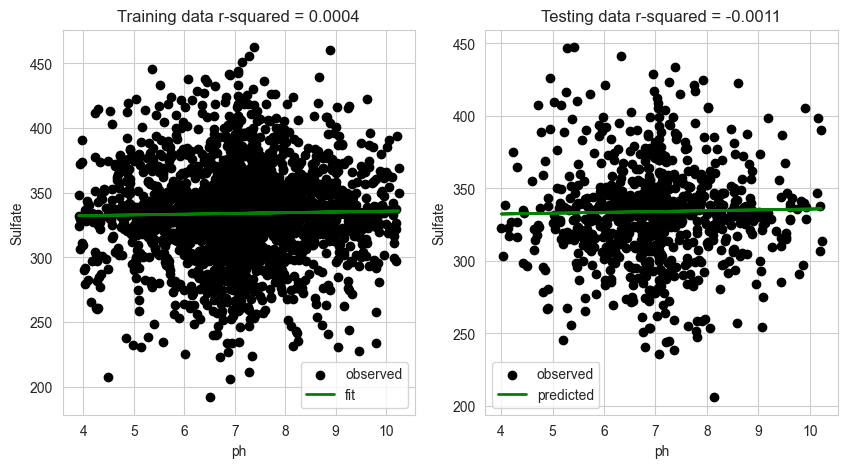

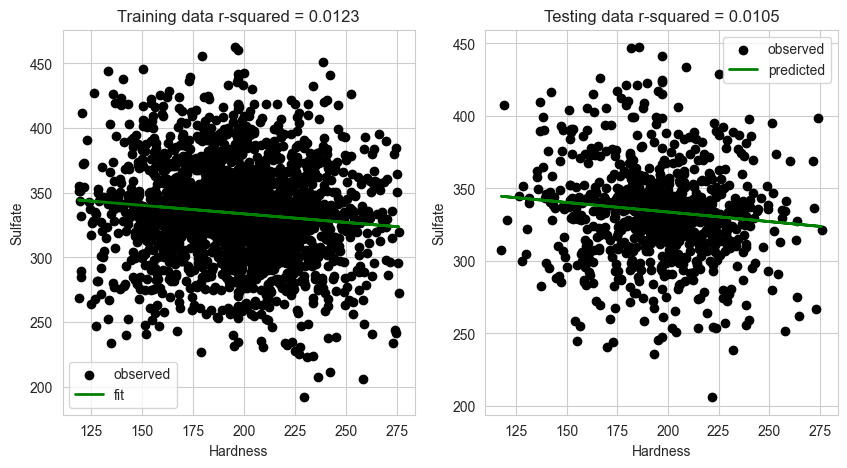

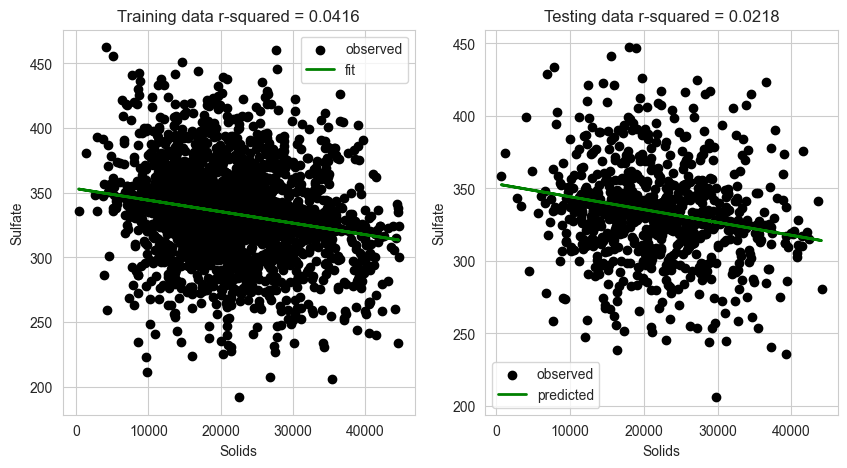

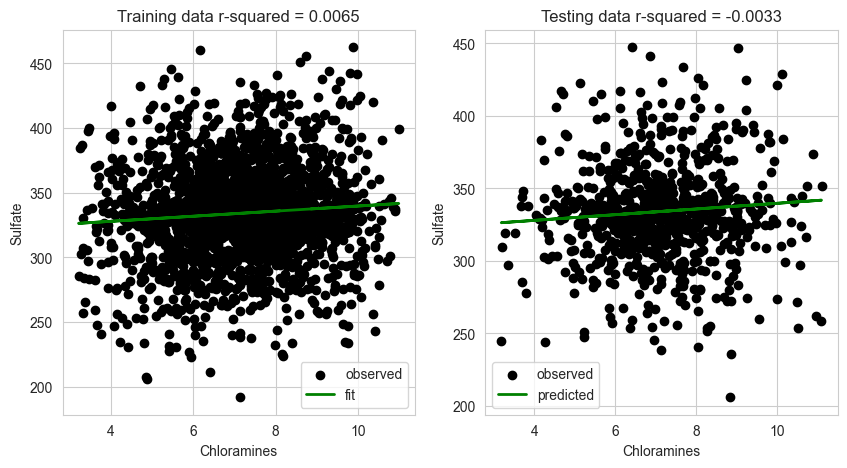

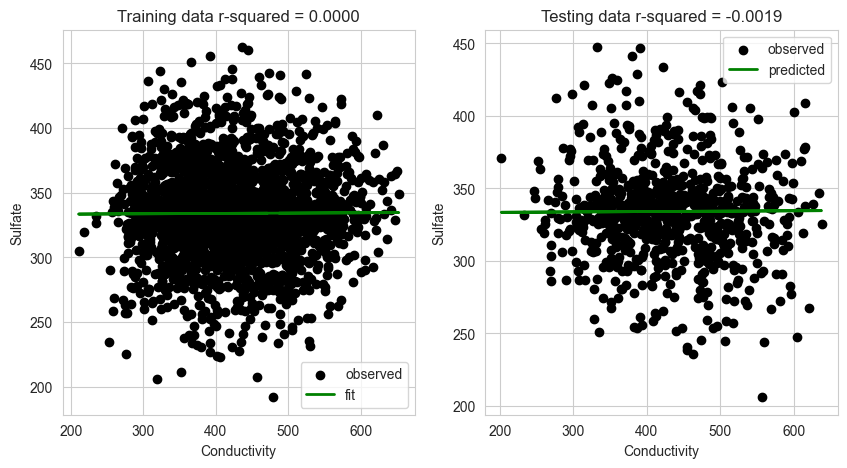

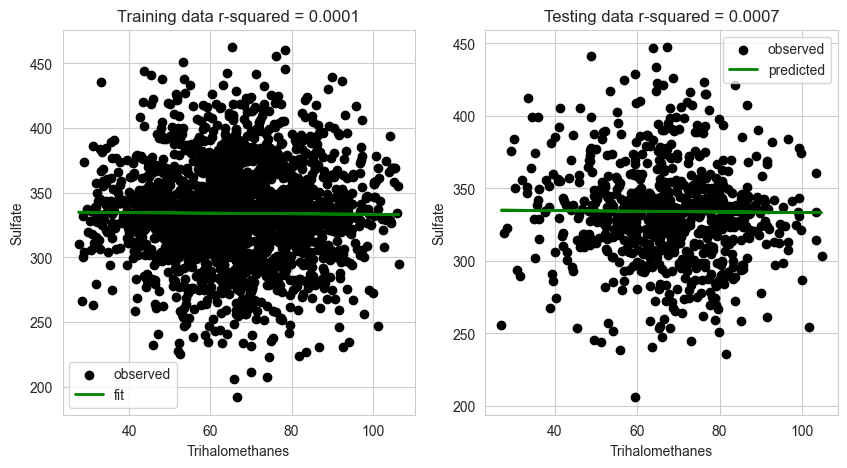

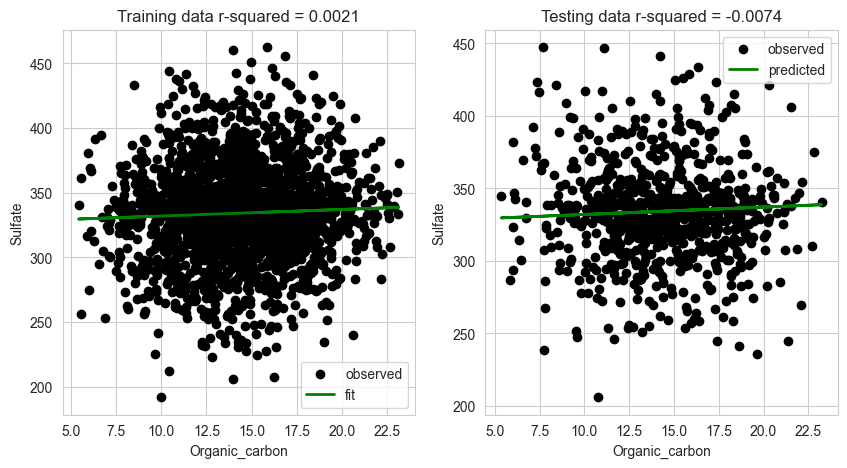

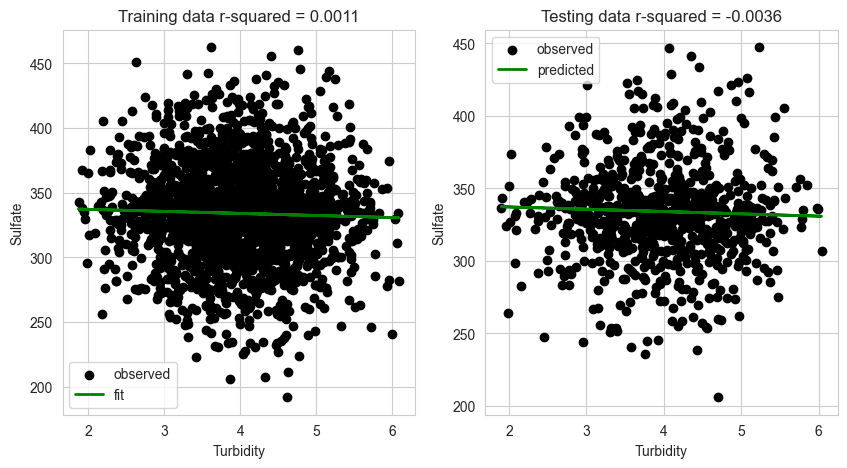

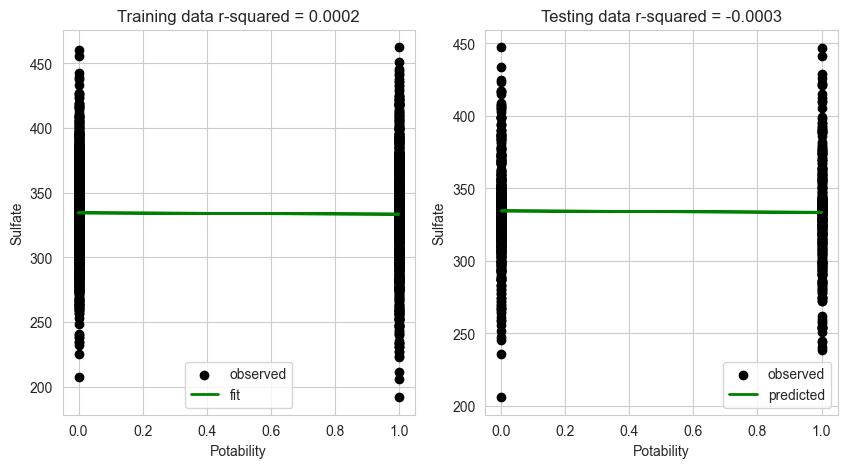

In [12]:
#Building simple linear regression model with each attribute and output attribute, Sulfate.
for x in X_cols:
    find_r2(x)

# 3. Verify relationship between R and R-square.

Pearson's Correlation Coefficient, R, shows the strength of relationship between any two attribute. R-square shows how variation in Sulfate attribute is explained by exploratory attribute. As the name states, R-square = R times R.

Considering the exploratory attribute 'Hardness' and the output attribute 'Sulfate', we get R value of 0.11 from the heatmap. The square of this value is approximately 0.0121, which is close to the R-squared value, obtained from the regression model using the training data set (0.0123). The same process can be done to any other attributes rather than 'Hardness', ending up with similar results. Therfore, it is verified that the square of Pearson's correlation coefficient determined in previous project part (Project_Part_2) is equal to R-square scores from the regression model.

Since this dataset is mainly used for the classification of water portability, none of the attributes other than 'Portability' have a strong relationship with the others. As a result, all the regression models show pretty low R-squared scores, regardless of whatever attribute being chosen as the output.